### KNN Regression으로 50cm 생선의 무게 예측

In [42]:
import numpy as np

In [43]:
fish_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )

fish_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

### Train Set과 Test Set 분리

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_length,
    fish_weight,
    random_state=42
)

In [46]:
# 1열로 구성된 배열로 재구성
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

### kNN Regression Model

In [47]:
from sklearn.neighbors import KNeighborsRegressor


In [48]:
# 이웃의 갯수를 3으로 선택
knr= KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

### 길이가 50cm인 생선의 무게 예측

In [49]:
knr.predict([[50]])

array([1033.33333333])

> 1033g

### 기존 데이터로 무게 확인

In [50]:
for i, v in list(enumerate(train_target)):
    if v == train_target.max():
        print(train_input[i], v) # 생선의 길이, 생선의 무게


[43.] 1100.0
[42.] 1100.0


In [51]:
train_target

array([  85.,  135.,   78.,   70.,  700.,  180.,  850.,  820., 1000.,
        120.,   85.,  130.,  225.,  260., 1100.,  900.,  145.,  115.,
        265., 1015.,  514.,  218.,  685.,   32.,  145.,   40.,  690.,
        840.,  300.,  170.,  650.,  110.,  150.,  110., 1000.,  150.,
         80.,  700.,  120.,  197., 1100.,  556.])

### 산점도로 이웃을 구해서 확인해보자

In [52]:
import matplotlib.pyplot as plt

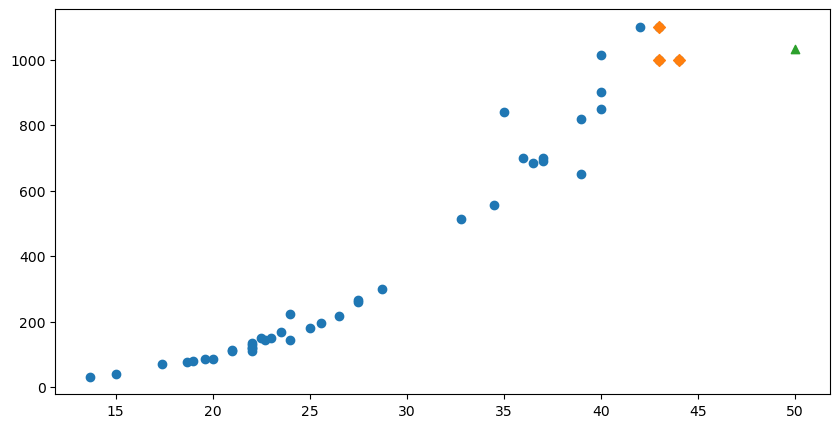

In [53]:
# 50cm인 생선의 이웃
distance, indexes = knr.kneighbors([[50]])

# 훈련세트의 산점도
plt.figure(figsize=(10,5))
plt.scatter(train_input, train_target)

# 훈련세트 중에서 이웃만 그리자
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 50cm인 생선의 위치
plt.scatter(50, 1033, marker='^')
plt.show()

In [54]:
# 이웃들의 평균값 계산
np.mean(train_target[indexes])

1033.3333333333333

### 길이가 100cm인 생선의 무게 예측 및 산포도로 위치 구하기

In [55]:
knr.predict([[100]])

array([1033.33333333])

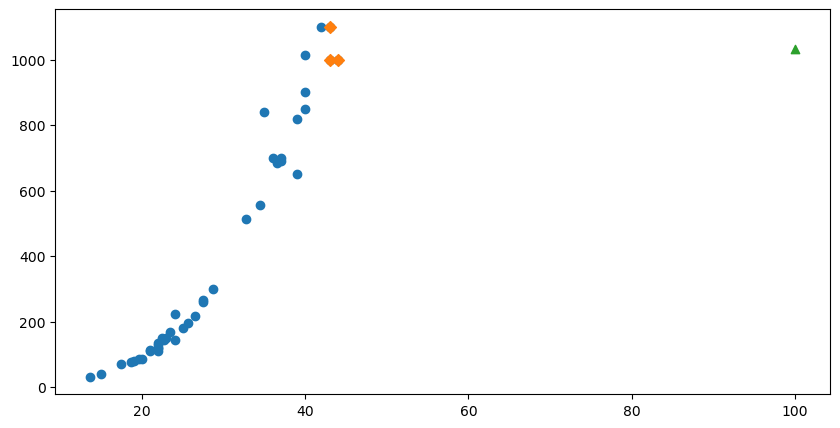

In [56]:
# 100cm인 생선의 이웃
distance, indexes = knr.kneighbors([[100]])

# 훈련세트의 산점도
plt.figure(figsize=(10,5))
plt.scatter(train_input, train_target)

# 훈련세트 중에서 이웃만 그리자
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 50cm인 생선의 위치
plt.scatter(100, 1033, marker='^')
plt.show()

> KNN Regression은 내 주변 이웃의 값들의 평균을 구하는 것이므로 학습한 데이터의 범위를 벗어나게 되면 사용할 수 없다.

---
### 선형 회귀(Linear regression)
: 직선이나 곡선의 함수식(방정식: Y=aX + b)을 이용하여 구하는 방식으로  
로지스틱 회귀분석이나 인공신경망의 기초가 되었다.

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
lr = LinearRegression()
lr.fit(train_input, train_target)

LinearRegression()

In [59]:
# 50cm인 생선의 무게
lr.predict([[50]])

array([1241.83860323])

In [60]:
# y = aX + b에서 기울기와 절편값 출력 (Deep learning에서 가중치(weight)와 Bias)
print(lr.coef_, lr.intercept_)


[39.01714496] -709.0186449535477


In [62]:
# 기울기와 절편으로 계산
39.01714496 * 50 - 709.0186449535477

1241.8386030464526